# <center>__Atividade 5a e 6a__</center>
### <center> Aluno: José Henrique Azevedo de Brito </center>
#### <center> Respostas </center>

In [104]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

1 Implemente os algoritmos da iteração de ponto fixo, Newton-Raphson e secante usando somentea biblioteca Numpy.

In [105]:
f = lambda x: np.exp(x) - x ** 2 - 6
fp = lambda x: np.exp(x) - 2 * x

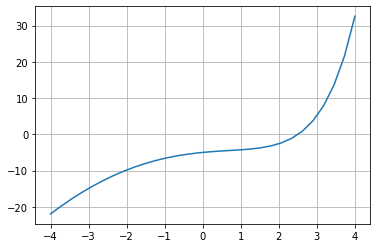

In [106]:
x = np.linspace(-4, 4, 30)
plt.plot(x, f(x))
plt.grid()

Ponto fixo

In [107]:
opt.fixed_point(f, x0 = 1, xtol=1e-6)

array(2.8195608)

Newton-Raphson

In [108]:
# opt.newton(f, x0 = 1, x1 = 2, rtol = 1e-6)
opt.root_scalar(f, fprime = fp, x0 = 1, x1 = 2, rtol = 1e-6, method = "newton")

      converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: 2.5093366680250364

Secante

In [109]:
opt.root_scalar(f, x0 = 1, x1 = 2,rtol = 1e-6, method = "secant")

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 2.509336668020757

2 Use a iteração de ponto fixo simples para localizar a raiz def(x)=2 sin(x**1/2)−x, tendo x0 = 0,5 e adotando como critério de parada o erro ea ≤ 0,001%.

In [110]:
f1 = lambda x: 2 * np.sin(x ** (1/2)) - x

<ipython-input-110-9d58eb971ca5>:1: RuntimeWarning: invalid value encountered in sqrt
  f1 = lambda x: 2 * np.sin(x ** (1/2)) - x


array(0.76864886)

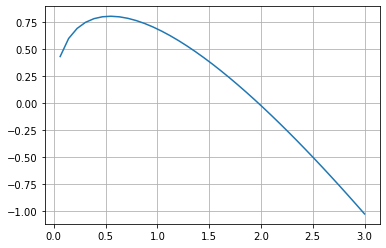

In [111]:
x = np.linspace(-1, 3, 50)
plt.plot(x, f1(x))
plt.grid()

opt.fixed_point(f1, x0 = 0.5, xtol = 1e-3)
# opt.newton(f1, x0 = 0.5, x1 = 1, rtol = 1e-3)

3 Determine a maior raiz real def(x)=2x^3 − 11.7x^2 + 17.7x − 5

In [112]:
f2 = lambda x: 2 * x ** 3 - 11.7 * x ** 2 + 17.7 * x - 5
g2 = lambda x: (2 * x ** 3 - 11.7 * x ** 2 - 5) / -17.7
f2p = lambda x: 6 * x ** 2 - 23.4 * x + 17.7

(a) Graficamente;

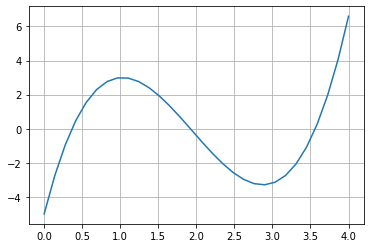

In [113]:
x = np.linspace(0, 4, 30)
plt.plot(x, f2(x))
plt.grid()

Graficamente, podemos dizer que a maior raiz dessa equação é algo próximo de 3.5

(b)  Pelo método da iteração de ponto fixo (três iterações,x0=3)( certifique-se de desenvolveruma solução que convirja para a raiz);

In [114]:
try:
    opt.fixed_point(g2, x0 = 3, maxiter = 3)
except RuntimeError as e:
    print(e)


Failed to converge after 3 iterations, value is 3.5631735644869535


O algoritmo diverge com 3 iterações, ou seja, ele não consegue se aproximar muito da raíz! É impossível que o algoritmo convirga com apenas 3 iterações

(c)  Pelo método de Newton-Raphson (três iterações,x0=3);

In [115]:
# opt.newton(f2, x0 = 3, maxiter = 3)
opt.root_scalar(f2, fprime = f2p, x0 = 3, maxiter = 3, method = "newton")

      converged: False
           flag: 'convergence error'
 function_calls: 6
     iterations: 3
           root: 3.7929344806432264

Aqui, também com 3 iterações não é possível se aproximar da raíz da equação

(d)  Pelo método da secante (três iterações,x−1=3,x0=4)

In [116]:
opt.root_scalar(f2, x0 = 2, x1 = 4, maxiter = 3, method = "secant")

      converged: False
           flag: 'convergence error'
 function_calls: 5
     iterations: 3
           root: 1.9019181824088716

Mais uma vez deu convergência, não foi possível se aproximar da raíz da equação

4 Compare os métodos da bisseção, falsa posição, do ponto fixo, de Newton-Raphson e da secante,localizando a raiz das seguintes equações:

In [117]:
rtol = 1e-10
maxiter = 200

def falsep(f, a, b, maxiter, erro) :
    x = 0
    flag = "convergence error"
    if (np.sign(f(a)) * np.sign(f(b)) != -1) :
        return "Não existe raiz nesse intervalo"
    else :
        erroAt, erroAn, i = 1, a, 0
        while (erroAt > erro and i < maxiter) :
            x = b - (f(b) * (a - b) / (f(a) - f(b)))
            if (f(x) == 0) :
                return ("Raiz encontrada! E ela é: " + x)
            else :
                if (np.sign(f(a)) * np.sign(f(x)) == -1) :
                    b = x
                else :
                    a = x
                erroAt = np.abs(x - erroAn) / np.abs(x)
                erroAn = x
            i += 1
            flag = "converged"
        if (erroAt > erro) :
            flag = "convergence error"
        return ("flag: %s\niterations: %d\nroot: %.14f" %(flag, i, x))

(a) f1(x)=2x⁴+4x³+3x²−10x−15, com x∗ ∈[0, 3]

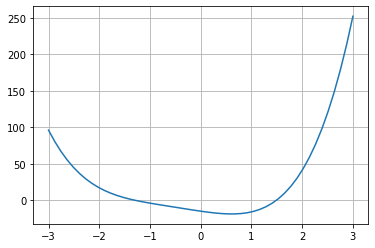

In [118]:
f = lambda x: 2 * x ** 4 + 4 * x ** 3 + 3 * x ** 2 - 10 * x - 15
g = lambda x: (2 * x ** 4 + 4 * x ** 3 + 3 * x ** 2 - 15) / 10
fprime = lambda x: 8 * x ** 3 + 12 * x ** 2 + 6 * x - 10
x0 = 0
x1 = 3

x = np.linspace(-3, 3, 50)
plt.plot(x, f(x))
plt.grid()

Bisseção

In [119]:
%timeit opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect")
print(opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect"))

38.6 µs ± 4.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.4928787086100783


Falsa posição

In [120]:
%timeit falsep(f, x0, x1, maxiter, rtol)
print(falsep(f, x0, x1, maxiter, rtol))

684 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
flag: converged
iterations: 64
root: 1.49287870840677


Ponto fixo

In [121]:
%timeit opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter)
print(opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter))

912 µs ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-1.3003841326439198


Newton-Raphson

In [122]:
%timeit opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton")
print(opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton"))

379 µs ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: -1.3003841326439198


Secante

In [123]:
%timeit opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant")
print(opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant"))

613 µs ± 56.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: -1.3003841326439196


(b) f2(x)=(x+3)(x+1)(x−2)³, com x∗ ∈ [0, 5]

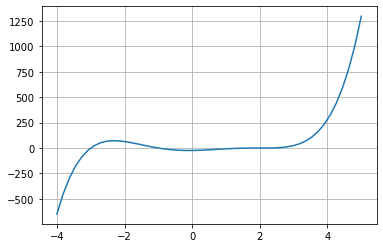

In [124]:
f = lambda x: (x + 3) * (x + 1) * (x - 2) ** 3
g = lambda x: (-x ** 4 + 9 * x ** 2 - 12) / 4
fprime = lambda x: 4 * x ** 3 - 18 * x + 4
x0 = 0
x1 = 5

x = np.linspace(-4, 5, 50)
plt.plot(x, f(x))
plt.grid()

Bisseção

In [125]:
%timeit opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect")
print(opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect"))

23 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.9999999999708962


Falsa posição

In [126]:
%timeit falsep(f, x0, x1, maxiter, rtol)
print(falsep(f, x0, x1, maxiter, rtol))

1.68 ms ± 305 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
flag: convergence error
iterations: 200
root: 1.71440913622764


Ponto fixo

In [127]:
%timeit opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter)
print(opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter))

292 µs ± 53.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-3.0


Newton-Raphson

In [128]:
%timeit opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton")
print(opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton"))

14.1 ms ± 828 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
      converged: False
           flag: 'convergence error'
 function_calls: 400
     iterations: 200
           root: nan


Secante

In [129]:
%timeit opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant")
print(opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant"))

2.31 ms ± 99.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
      converged: True
           flag: 'converged'
 function_calls: 61
     iterations: 60
           root: 2.00000003865488


(c) f3(x) = 5x³ + x² − e ^ (1 - 2x) + cos(x) + 20, com x ∗ ∈ [−5, 5]

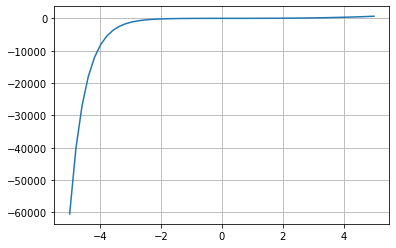

In [130]:
f = lambda x: 5 * x ** 3 + x ** 2 - np.exp(1 - 2 * x) + np.cos(x) + 20
g = lambda x: (-x ** 2 + np.exp(1 - 2 * x) + np.cos(x) + 20) / 5 * x ** 2
fprime = lambda x: 15 * x ** 2 + 2 * x + 2 * np.exp(-2 * x + 1) - np.sin(x)
x0 = -5
x1 = 5

x = np.linspace(-5, 5, 50)
plt.plot(x, f(x))
plt.grid()

Bisseção

In [131]:
%timeit opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect")
print(opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect"))

93.7 µs ± 3.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 39
     iterations: 37
           root: -0.9295604598446516


Falsa posição

In [132]:
%timeit falsep(f, x0, x1, maxiter, rtol)
print(falsep(f, x0, x1, maxiter, rtol))

5.11 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
flag: convergence error
iterations: 200
root: 1.56876926107800


Ponto fixo

In [133]:
%timeit opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter)
print(opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter))

138 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
-4.9999999999442


Newton-Raphson

In [134]:
%timeit opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton")
print(opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton"))

616 µs ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 26
     iterations: 13
           root: -0.9295604598378413


Secante

In [135]:
%timeit opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant")
print(opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant"))

987 µs ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 24
     iterations: 23
           root: -0.9295604598378417


(d) f4(x) = sin(x)x + 4, com x ∗ ∈ [1, 5]

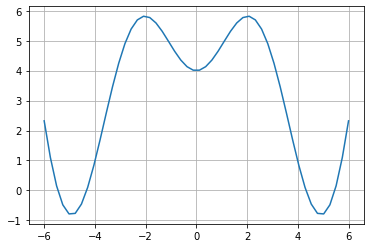

In [136]:
f = lambda x: np.sin(x) * x + 4
g = lambda x: -4 / np.sin(x)
fprime = lambda x: x * np.cos(x) + np.sin(x)
x0 = 1
x1 = 5

x = np.linspace(-6, 6, 50)
plt.plot(x, f(x))
plt.grid()

Bisseção

In [137]:
%timeit opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect")
print(opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect"))

51.6 µs ± 2.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 4.323239543708041


Falsa posição

In [138]:
%timeit falsep(f, x0, x1, maxiter, rtol)
print(falsep(f, x0, x1, maxiter, rtol))

125 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
flag: converged
iterations: 10
root: 4.32323954371448


Ponto fixo

In [139]:
%timeit opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter)
print(opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter))

760 µs ± 24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-4.323239543713715


Newton-Raphson

In [140]:
%timeit opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton")
print(opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton"))

299 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 8
           root: -5.461308012588998


Secante

In [141]:
%timeit opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant")
print(opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant"))

250 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 4.323239543713714


(e) f5 (x) = (x − 3)⁵ ln(x), com x ∗ ∈ [2, 5]

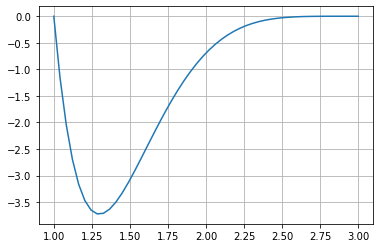

In [142]:
f = lambda x: (x - 3) ** 5 * np.log(x)
g = lambda x: (x ** 3 * np.log(x) - 15 * x ** 4 * np.log(x) + 90 * x ** 3 * np.log(x) - 270 * x ** 2 * np.log(x) - 243 * np.log(x)) / -405 * np.log(x)
fprime = lambda x: 5 * np.log(x) * (x - 4) ** 5 + ((x - 3) ** 5 / x)
x0 = 2
x1 = 5

x = np.linspace(1, 3, 50)
plt.plot(x, f(x))
plt.grid()

Bisseção

In [143]:
%timeit opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect")
print(opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect"))

40.2 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 2.9999999999417923


Falsa posição

In [144]:
%timeit falsep(f, x0, x1, maxiter, rtol)
print(falsep(f, x0, x1, maxiter, rtol))

2.92 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
flag: convergence error
iterations: 200
root: 2.59390976420546


Ponto fixo

In [145]:
try :
    %timeit opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter)
    print(opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter))
except RuntimeError as e :
    print(e)

Failed to converge after 200 iterations, value is nan


<ipython-input-142-3815d8118e97>:2: RuntimeWarning: invalid value encountered in log
  g = lambda x: (x ** 3 * np.log(x) - 15 * x ** 4 * np.log(x) + 90 * x ** 3 * np.log(x) - 270 * x ** 2 * np.log(x) - 243 * np.log(x)) / -405 * np.log(x)


Newton-Raphson

In [146]:
%timeit opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton")
print(opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton"))

3.36 ms ± 193 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
      converged: True
           flag: 'converged'
 function_calls: 168
     iterations: 84
           root: 1.0


Secante

In [147]:
%timeit opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant")
print(opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant"))

3.92 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
      converged: True
           flag: 'converged'
 function_calls: 107
     iterations: 106
           root: 2.999999917819786


(f) f6(x) = x¹⁰ − 1, com x ∗ ∈ [0.8, 1.2]

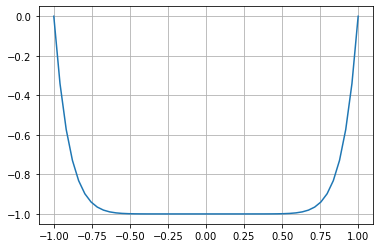

In [148]:
f = lambda x: x ** 10 - 1
g = lambda x: 1 / (x ** 9)
fprime = lambda x: 10 * x ** 9
x0 = 0.8
x1 = 1.2

x = np.linspace(-1, 1, 50)
plt.plot(x, f(x))
plt.grid()

Bisseção

In [149]:
%timeit opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect")
print(opt.root_scalar(f, bracket = [x0, x1], rtol = rtol, maxiter = maxiter, method = "bisect"))

7.72 µs ± 206 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 1
           root: 1.0


Falsa posição

In [150]:
%timeit falsep(f, x0, x1, maxiter, rtol)
print(falsep(f, x0, x1, maxiter, rtol))

167 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
flag: converged
iterations: 45
root: 0.99999999990030


Ponto fixo

In [151]:
%timeit opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter)
print(opt.fixed_point(g, x0 = x0, xtol = rtol, maxiter = maxiter))

247 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.936636884898033


Newton-Raphson

In [152]:
%timeit opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton")
print(opt.root_scalar(f, fprime = fprime, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "newton"))

376 µs ± 45.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 20
     iterations: 10
           root: 1.0


Secante

In [153]:
%timeit opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant")
print(opt.root_scalar(f, x0 = x0, x1 = x1, rtol = rtol, maxiter = maxiter, method = "secant"))

316 µs ± 21.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 0.9999999999999333
